In [5]:
import os
import sys
import logging
# import glob
# import time
# import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Custom packages
import iXAtom_Class_Physics       as iXC_Physics
import iXAtom_Class_RunParameters as iXC_RunPars
import iXAtom_Class_Detector      as iXC_Detect
import iXAtom_Class_Ramsey        as iXC_Ramsey
import iXAtom_Utilities           as iXUtils

# For inline plots
%matplotlib inline
# Reload IPython extension 'autoreload'
%reload_ext autoreload
# autoreload: Reload all modules (except those excluded by %aimport) automatically now
# autoreload 0: Disable automatic reloading of modules
# autoreload 1: Reload all modules imported with %aimport every time before executing
# autoreload 2: Reload all modules (except those excluded by %aimport) every time before executing
%autoreload 1

%aimport iXAtom_Class_Physics
%aimport iXAtom_Class_RunParameters
%aimport iXAtom_Class_Detector
%aimport iXAtom_Class_Ramsey
%aimport iXAtom_Utilities

logging.disable(level=logging.NOTSET)

iXUtils.SetDefaultPlotOptions()

In [3]:
RootDir = 'C:\\Bryns Goodies\\Work-iXAtom\\Data 2020'
Date    = {'Month': 'February', 'Day': 28}
WorkDir = os.path.join(RootDir, Date['Month'], '{:02d}'.format(Date['Day']))
Folder  = 'Ramsey'
RunNum  = 1

RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunNum)
RunPars.LoadRunParameters()

Physics = iXC_Physics.Physics(RunPars)

pd.DataFrame(RunPars.__dict__.items())

,0,1
0,SoftwareVersion,3.3
1,Run,1
2,DataType,Ramsey
3,TrackProtocol,Two-Point kInterlaced
4,TrackMode,Closed Loop
5,AxisMode,Z-Only
6,RamanScanMode,Phase kInterlaced
7,ScanQuantity,Selection Frequency (Hz)
8,kUpFrequency,6.83468e+09
9,kDownFrequency,6.83468e+09


------------ Tilt = 0.0 deg ------------
Slope  = (0.0287 +/- 0.0050) mG/mm
Offset = (0.173993 +/- 0.000042) G
------------ Tilt = 15.0 deg ------------
Slope  = (0.0014 +/- 0.0111) mG/mm
Offset = (0.174358 +/- 0.000054) G
------------ Tilt = 29.9 deg ------------
Slope  = (-0.0157 +/- 0.0135) mG/mm
Offset = (0.174224 +/- 0.000067) G
------------ Tilt = 45.8 deg ------------
Slope  = (-0.0456 +/- 0.0089) mG/mm
Offset = (0.173660 +/- 0.000044) G


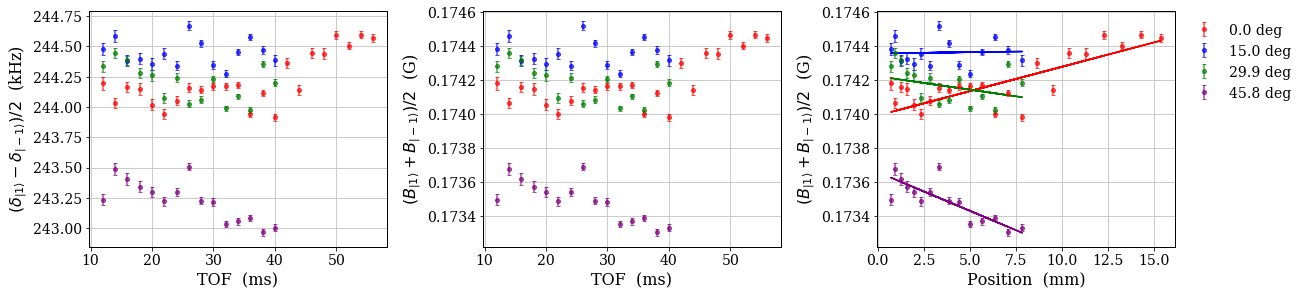

In [21]:
#========================================================================================= 
#  Plot analysis summary results for specific runs on specific days
#=========================================================================================

DateList = [{'Month': 'February', 'Day': 28}, {'Month': 'February', 'Day': 28}, 
            {'Month': 'February', 'Day': 28}, {'Month': 'February', 'Day': 28}]
RunLists = [[1,23], [24,38], [39,53], [54,68]]
TiltList = [0.,15.,29.9,45.8] ## deg 
dBZList  = np.zeros((2,len(TiltList))) ## iErr, iRun
BZ0List  = np.zeros((2,len(TiltList))) ## iErr, iRun
Colors   = ['red', 'blue', 'green', 'purple']
iStarts  = [0,0,0,0]
nList    = len(RunLists)

mpl.rc('font', size=14, family='serif')
mpl.rc('axes', titlesize=14, labelsize=16, edgecolor='black', linewidth=1)
mpl.rc('legend', fontsize=14)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,4), constrained_layout=True)

for r in range(nList):
    RunList = RunLists[r]
    WorkDir = os.path.join(RootDir, DateList[r]['Month'], '{:02d}'.format(DateList[r]['Day']))
    RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunList[0])
    RunPars.LoadRunParameters()

    Physics = iXC_Physics.Physics(RunPars)
    iaxList = RunPars.iaxList
    ikList  = RunPars.ikList
    keff    = RunPars.keff
    gLocal  = RunPars.gLocal

    SummaryFolder     = os.path.join(WorkDir, 'PostProcessed', Folder)
    SummaryFilePrefix = Folder + '-Runs{:02d}-{:02d}-AnalysisSummary-'.format(min(RunList), max(RunList))
    SummaryFilePaths  = [os.path.join(SummaryFolder, SummaryFilePrefix + RunPars.AxisFileLabels[iax][0] + '.txt') for iax in range(3)]

    SummaryDF = [pd.DataFrame([]) for iax in range(3)]

    for iax in iaxList:
        if os.path.exists(SummaryFilePaths[iax]):
            SummaryDF[iax] = pd.read_csv(SummaryFilePaths[iax], sep='\t')
        else:
            print('Summary file not found: {}'.format(SummaryFilePaths[iax]))

    ## Default plot options
    PlotOpts = {'Color': Colors[r], 'Linestyle': 'None', 'Marker': '.',
        'Title': 'None', 'xLabel': 'TOF  (ms)', 'yLabel': 'None',
        'LegLabel': 'None', 'Legend': False, 'LegLocation': 'best'}

    for iax in iaxList:
        RamanTOF = SummaryDF[iax]['RamanTOF']

        PlotOpts['yLabel']   = r'$(\delta_{|1\rangle} - \delta_{|-1\rangle})/2$  (kHz)'
        PlotOpts['LegLabel'] = '{:.1f} deg'.format(TiltList[r])
        deltaB = 0.5*(SummaryDF[iax]['p03_center'] - SummaryDF[iax]['p01_center']).to_numpy()
        deltaB_Err = 0.5*np.sqrt(SummaryDF[iax]['p03_center_Err']**2 + SummaryDF[iax]['p01_center_Err']**2).to_numpy()
        iXUtils.CustomPlot(axs[0], PlotOpts, RamanTOF*1.E3, deltaB, deltaB_Err)

        PlotOpts['yLabel']   = r'$(B_{|1\rangle} + B_{|-1\rangle})/2$  (G)'
        B1 = Physics.BBreitRabi(1., -1., 2., -1., SummaryDF[iax]['p01_center']*1.E3).to_numpy()
        B3 = Physics.BBreitRabi(1., +1., 2., +1., SummaryDF[iax]['p03_center']*1.E3).to_numpy()
        BMean = 0.5*(B3+B1)
        BMean_Err = 0.5*(B3+B1)*deltaB_Err/deltaB
        iXUtils.CustomPlot(axs[1], PlotOpts, RamanTOF*1.E3, BMean, BMean_Err)

        PlotOpts['xLabel']   = 'Position  (mm)'
        PlotOpts['yLabel']   = r'$(B_{|1\rangle} + B_{|-1\rangle})/2$  (G)'
        zList = 0.5*gLocal*(RamanTOF)**2
        iXUtils.CustomPlot(axs[2], PlotOpts, zList*1.E3, BMean, BMean_Err)

        ## Linear fit
        iStart = iStarts[r]
        pOpt, pCov = np.polyfit(zList[iStart:]*1.E3, BMean[iStart:], deg=1, w=1./BMean_Err[iStart:], full=False, cov=True)
        pErr  = np.sqrt(np.diag(pCov))
        pFit  = np.poly1d(pOpt)

        dBZList[0,r] = pOpt[0]
        dBZList[1,r] = pErr[0]
        BZ0List[0,r] = pOpt[1]
        BZ0List[1,r] = pErr[1]
        
#         PlotOpts['Color']     = 'black'
        PlotOpts['Linestyle'] = '-'
        PlotOpts['Marker']    = 'None'
        PlotOpts['LegLabel']  = None
        iXUtils.CustomPlot(axs[2], PlotOpts, zList*1.E3, pFit(zList*1.E3))

    # plotPath = 'C:\\Bryns Goodies\\Test.pdf'
    # plt.savefig(plotPath, dpi=150)

    print('------------ Tilt = {:.1f} deg ------------'.format(TiltList[r]))
    print('Slope  = ({:.4f} +/- {:.4f}) mG/mm'.format(pOpt[0]*1.E3, pErr[0]*1.E3))
    print('Offset = ({:.6f} +/- {:.6f}) G'.format(pOpt[1], pErr[1]))

axs[2].legend(loc='upper left', bbox_to_anchor=(1.01,1.0))

plt.show()

--------------- BZ(0) fit ---------------
Curvature = (-0.000992 +/- 0.000050) mG/deg^2
Slope     = (0.0380 +/- 0.0024) mG/deg
Offset    = (173.996 +/- 0.019) mG
--------------- dBZdZ fit ---------------
Slope  = (-0.001606 +/- 0.000060) mG/mm/deg
Offset = (0.0285 +/- 0.0013) mG/mm


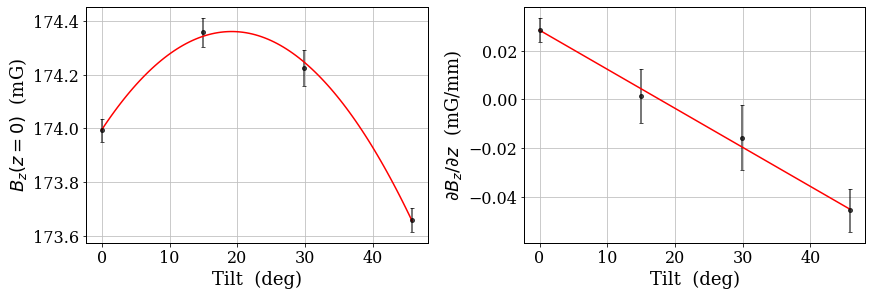

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)

PlotOpts['Color']     = 'black'
PlotOpts['Linestyle'] = 'None'
PlotOpts['Marker']    = '.'
PlotOpts['xLabel']    = 'Tilt  (deg)'
PlotOpts['yLabel']    = r'$B_{z}(z = 0)$  (mG)'
iXUtils.CustomPlot(axs[0], PlotOpts, TiltList, BZ0List[0]*1.E3, BZ0List[1]*1.E3)

## Quadratic fit
pOpt, pCov = np.polyfit(TiltList, BZ0List[0], deg=2, w=1./BZ0List[1], full=False, cov=True)
pErr = np.sqrt(np.diag(pCov))
pFit = np.poly1d(pOpt)

print('--------------- BZ(0) fit ---------------')
print('Curvature = ({:.6f} +/- {:.6f}) mG/deg^2'.format(pOpt[0]*1.E3, pErr[0]*1.E3))
print('Slope     = ({:.4f} +/- {:.4f}) mG/deg'.format(pOpt[1]*1.E3, pErr[1]*1.E3))
print('Offset    = ({:.3f} +/- {:.3f}) mG'.format(pOpt[2]*1.E3, pErr[2]*1.E3))

PlotOpts['Color']     = 'red'
PlotOpts['Linestyle'] = '-'
PlotOpts['Marker']    = 'None'
x = np.linspace(min(TiltList), max(TiltList), num=100, endpoint=True)
iXUtils.CustomPlot(axs[0], PlotOpts, x, pFit(x)*1E3)

PlotOpts['Color']     = 'black'
PlotOpts['Linestyle'] = 'None'
PlotOpts['Marker']    = '.'
PlotOpts['xLabel']    = 'Tilt  (deg)'
PlotOpts['yLabel']    = r'$\partial B_z/\partial z$  (mG/mm)'
iXUtils.CustomPlot(axs[1], PlotOpts, TiltList, dBZList[0]*1.E3, dBZList[1]*1.E3)

## Linear fit
pOpt, pCov = np.polyfit(TiltList, dBZList[0], deg=1, w=1./dBZList[1], full=False, cov=True)
pErr = np.sqrt(np.diag(pCov))
pFit = np.poly1d(pOpt)

print('--------------- dBZdZ fit ---------------')
print('Slope  = ({:.6f} +/- {:.6f}) mG/mm/deg'.format(pOpt[0]*1.E3, pErr[0]*1.E3))
print('Offset = ({:.4f} +/- {:.4f}) mG/mm'.format(pOpt[1]*1.E3, pErr[1]*1.E3))

PlotOpts['Color']     = 'red'
PlotOpts['Linestyle'] = '-'
PlotOpts['Marker']    = 'None'
iXUtils.CustomPlot(axs[1], PlotOpts, TiltList, pFit(TiltList)*1E3)

plt.show()